In [1]:
bodtmp <- read.csv('bodytemp.csv', head=TRUE, sep=',')
bodtmp[sample(nrow(bodtmp), 10), ]

,temperature,gender,rate
105,98.6,2,77
25,97.9,1,72
87,98.2,2,73
62,99.2,1,83
112,98.8,2,64
74,97.7,2,61
86,98.1,2,81
35,98.2,1,64
80,97.9,2,79
69,97.2,2,66


In [2]:
bodtmpus <- unstack(bodtmp, temperature~gender)
bodtmpus[sample(nrow(bodtmpus), 10), ]

,X1,X2
4,97.0,97.2
26,98.0,98.2
23,97.8,98.2
24,97.9,98.2
47,98.6,98.8
7,97.1,97.6
5,97.1,97.2
11,97.4,97.8
29,98.0,98.3
43,98.4,98.7


In [9]:
round(mean(bodtmpus[[1]]), 1)
round(mean(bodtmpus[[2]]), 1)

[1] 98.1

[1] 98.4

In [7]:
theta <- 0
ksi <- 0
theta[1] <- mean(bodtmpus[[1]])

k <- 1
while(k < 1001) {
ksi[k] <- rgamma(1, 65 / 2 + 2, rate=(32.5 * (theta[k] - 98.10462)^2) + 32 * var(bodtmpus[[1]]) + 2)
theta[k+1] <- rnorm(1, (ksi[k] * 65 * 98.10462 + 394.4) / (ksi[k] * 65 + 4), sqrt(1 / (ksi[k] * 65 + 4))) 
k <- k + 1
}

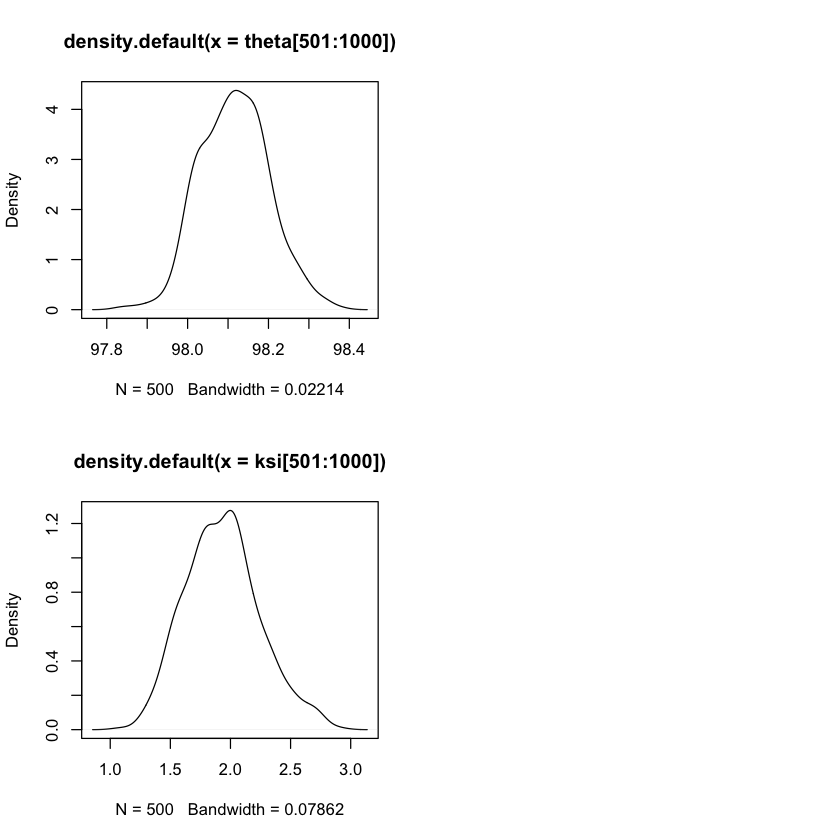

In [8]:
par( mfcol = c(2, 2)) 
dthetaMales <- density(theta[501:1000])
dksiMales <- density(ksi[501:1000])
plot(dthetaMales)
plot(dksiMales)

In [11]:
summary(theta[501:1000])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  97.83   98.05   98.12   98.12   98.17   98.38 